In [172]:
#main libraries
import os
import re
import pickle
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook


#machine learning libraries:
from sklearn.model_selection import KFold,StratifiedKFold, cross_validate, cross_val_score, train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import re
%matplotlib inline
sns.set_theme(style="whitegrid")
import warnings


warnings.filterwarnings("ignore")

In [173]:
'''Data Preprocessing'''

'Data Preprocessing'

In [174]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

#joining all the data together
full_data = pd.concat([train_data, test_data])

#making a copy of the original data
train_data_orig = train_data.copy()
test_data_orig = test_data.copy()

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
train_data.shape

(891, 12)

In [176]:
#printing the shape of the data
print('This data contrains {} rows and {} columns splitted into train and test datasets with ratio {}'.format(full_data.shape[0], full_data.shape[1], round((test_data.shape[0]/train_data.shape[0])*100,2)))

This data contrains 1309 rows and 12 columns splitted into train and test datasets with ratio 46.91


In [177]:
cols = train_data.columns
print(f"We have {len(cols)} columns : \n{cols}")

We have 12 columns : 
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [178]:
#Seeing the information about the data
train_data.info()
print("_"*40)
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [179]:
#To show the types of columns
train_data.dtypes.to_frame().rename(columns={0:'Column type'})


,Column type
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [180]:
#to find unique values in each column
for col in train_data.columns:
    print('We have {} unique values in {} column'.format(
        len(train_data[col].unique()),col))
    print('-'*35)

We have 891 unique values in PassengerId column
-----------------------------------
We have 2 unique values in Survived column
-----------------------------------
We have 3 unique values in Pclass column
-----------------------------------
We have 891 unique values in Name column
-----------------------------------
We have 2 unique values in Sex column
-----------------------------------
We have 89 unique values in Age column
-----------------------------------
We have 7 unique values in SibSp column
-----------------------------------
We have 7 unique values in Parch column
-----------------------------------
We have 681 unique values in Ticket column
-----------------------------------
We have 248 unique values in Fare column
-----------------------------------
We have 148 unique values in Cabin column
-----------------------------------
We have 4 unique values in Embarked column
-----------------------------------


In [181]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [182]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [183]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [184]:
train_data['Pclass'].unique()

array([3, 1, 2])

In [185]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [186]:
print('Age columns vary from {} to {}'.format(train_data['Age'].min(), train_data['Age'].max()))

Age columns vary from 0.42 to 80.0


In [187]:
#describing our data
train_data[train_data.select_dtypes(exclude='object').columns].drop('PassengerId', axis = 1).describe().\
style.background_gradient(axis=1, cmap = sns.light_palette('skyblue', as_cmap = True))


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [188]:
#finding the null values in each column
train_data.isnull().sum().to_frame().rename(columns={0:"Null values"})

,Null values
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


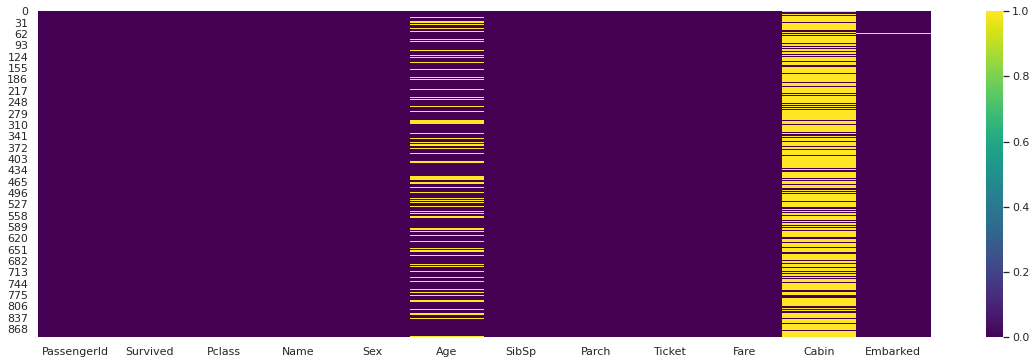

In [189]:
#Visualizing the null values in each column
plt.figure(figsize= (20,6));
sns.heatmap(train_data.isnull(), cmap = 'viridis');

In [190]:
#To see the correlation between columns and target column
corr = train_data.corr()
corr['Survived'].sort_values(ascending = False)[1:].to_frame().\
style.background_gradient(axis = 1, cmap = sns.light_palette('green', as_cmap=True))

,Survived
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.077221
Pclass,-0.338481


In [191]:
#lets take a look to the shape of columns
train_data.skew().to_frame().rename(columns = {0: 'Skewness'}).sort_values('Skewness')


,Skewness
Pclass,-0.630548
PassengerId,0.000000
Age,0.389108
Survived,0.478523
Parch,2.749117
SibSp,3.695352
Fare,4.787317


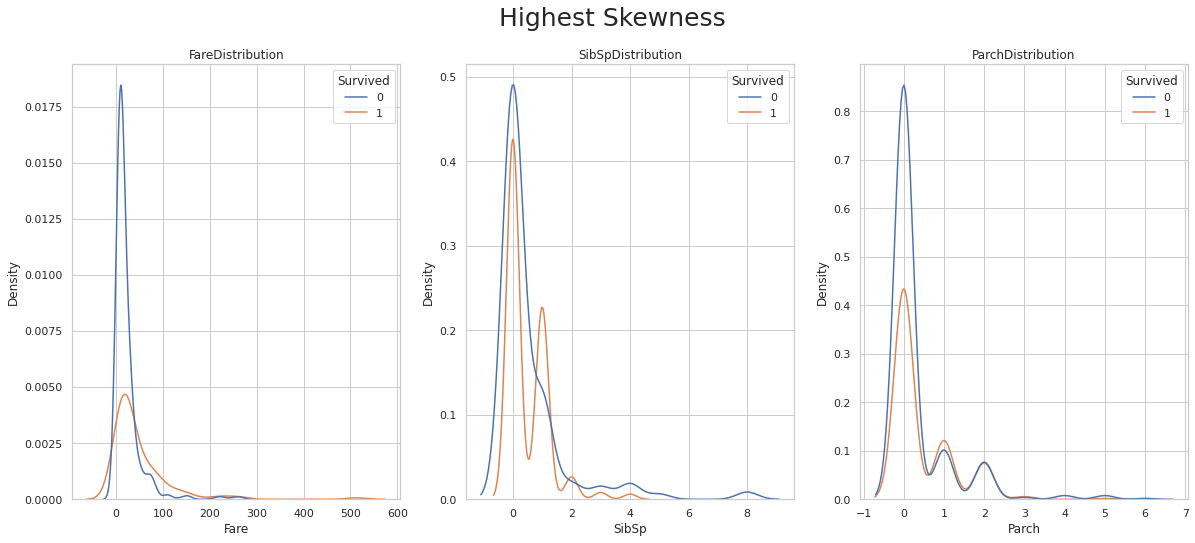

In [192]:
#Visualizing columns haveing highest Skewness
fig, axes = plt.subplots(1,3, figsize=(20,8));
fig.suptitle('Highest Skewness', fontsize = 25)

for i, col in zip(range(3), ['Fare', 'SibSp', 'Parch']):
    sns.kdeplot(train_data[col], ax = axes[i], hue=train_data['Survived'])
    axes[i].set_title(col+'Distribution')
    


    WE have a lot of null values in cabin 687 and age 177 columns

    Survived column have a higher correlation with:
        Pclass -0.338481
        Fare 0.257307
        Parch 0.081629    

    We have some columns with a high skewness
        Fare 4.787317
        SibSp 3.695352


# Analyze by pivoting features

    Pclass
    Sex
    SibSp and Parch

In [193]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index= False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [194]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [195]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index= False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [196]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index= False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# BASIC EDA
    For Training Data

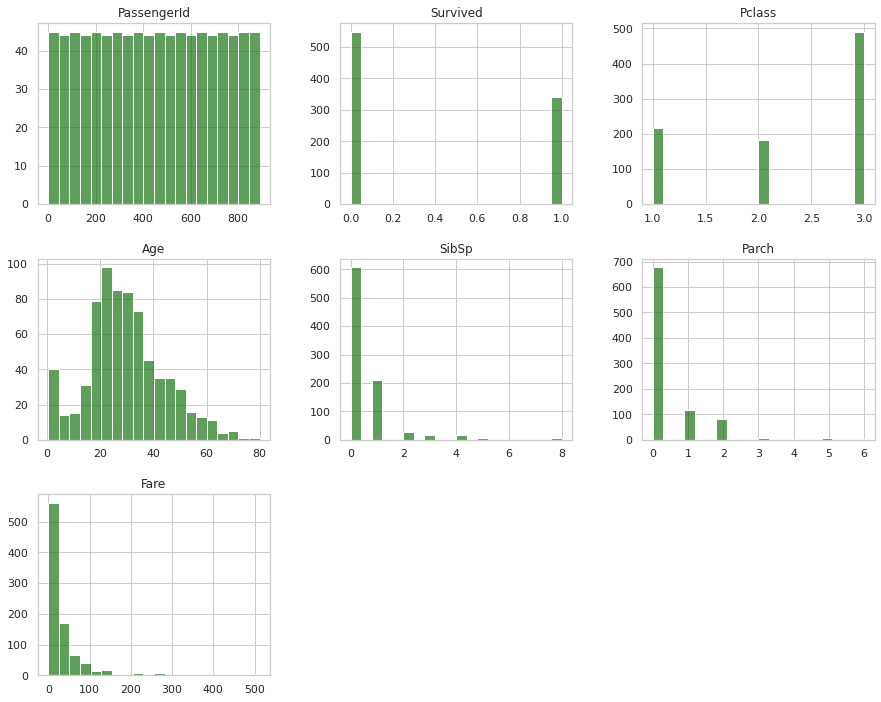

In [197]:
train_data.hist(figsize=(15,12),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

# Data Exploration and Analysis

Frequency Distribution of Pclass

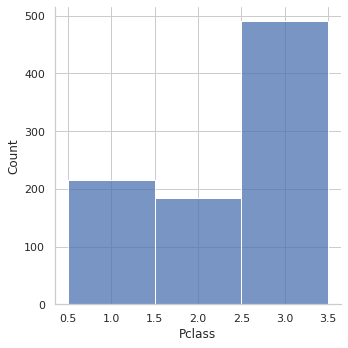

In [198]:
sns.displot(train_data, x="Pclass", discrete=True)

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

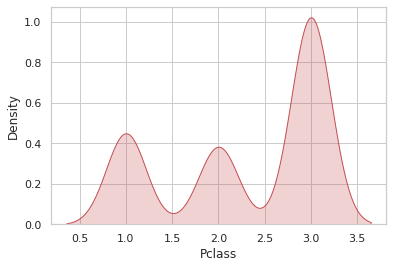

In [199]:
sns.kdeplot(train_data['Pclass'], shade=True, color="r")

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

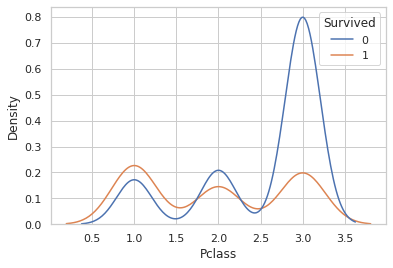

In [200]:
sns.kdeplot(data=train_data, x="Pclass", hue="Survived")

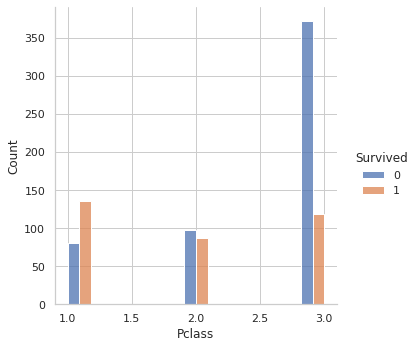

In [201]:
sns.displot(train_data, x="Pclass", hue="Survived", multiple="dodge")

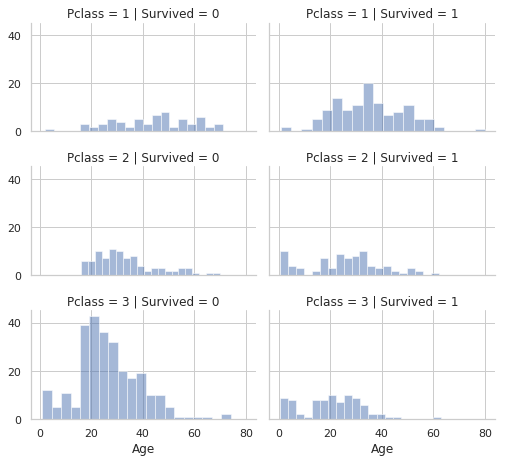

In [202]:
#for Pclass 
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Frequency Distribution for Age

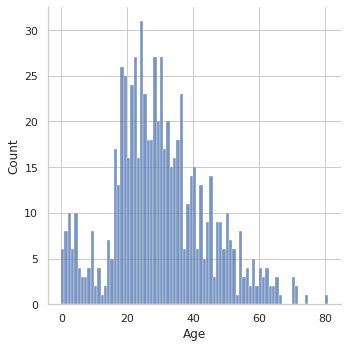

In [203]:
sns.displot(train_data, x="Age", discrete=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

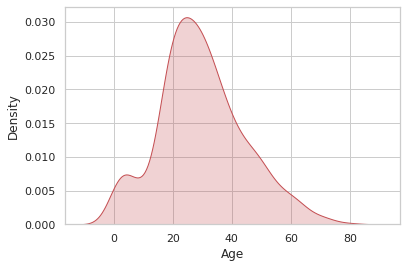

In [204]:
sns.kdeplot(train_data['Age'], shade=True, color="r")

<AxesSubplot:xlabel='Age', ylabel='Density'>

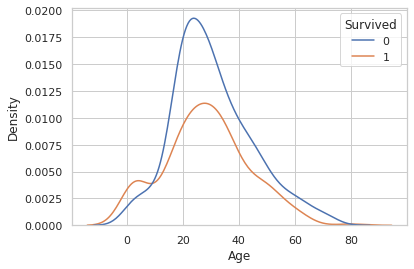

In [205]:
sns.kdeplot(data=train_data, x="Age", hue="Survived")

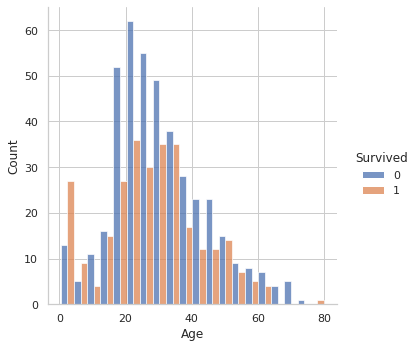

In [206]:
sns.displot(train_data, x="Age", hue="Survived", multiple="dodge")

Frequency Distribution for Sibsp

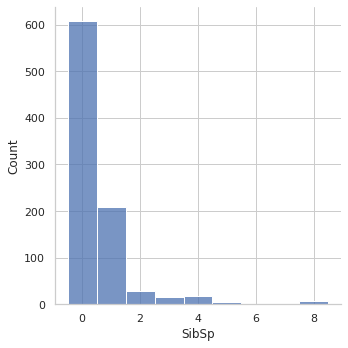

In [207]:
sns.displot(train_data, x="SibSp", discrete=True)

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

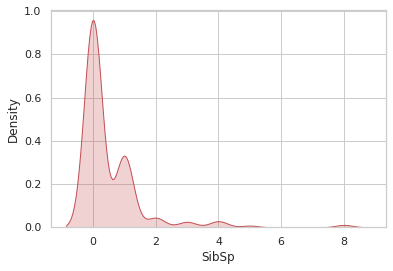

In [208]:
sns.kdeplot(train_data['SibSp'], shade=True, color="r")

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

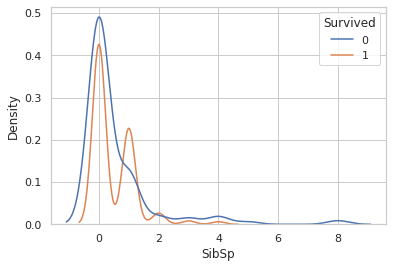

In [209]:
sns.kdeplot(data=train_data, x="SibSp", hue="Survived")

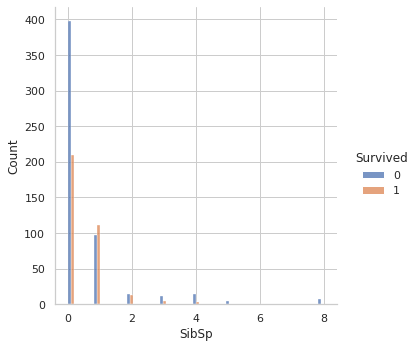

In [210]:
sns.displot(train_data, x="SibSp", hue="Survived", multiple="dodge")

For Embarked

<AxesSubplot:xlabel='Embarked', ylabel='count'>

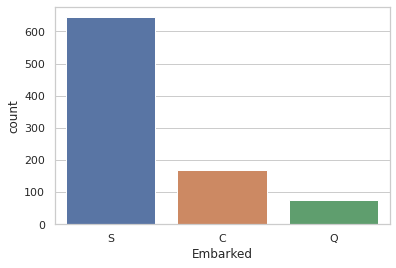

In [211]:
sns.countplot(x ='Embarked', data = train_data)

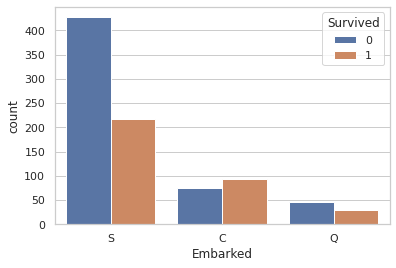

In [212]:
cp = sns.countplot(x="Embarked", hue="Survived", data=train_data)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

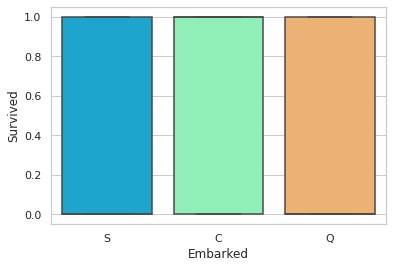

In [213]:


sns.boxplot(x='Embarked',y='Survived',data=train_data,palette='rainbow')

Visualizing Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

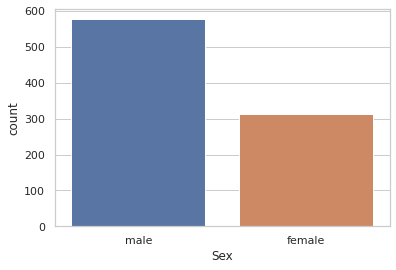

In [214]:
sns.countplot(x ='Sex', data = train_data)

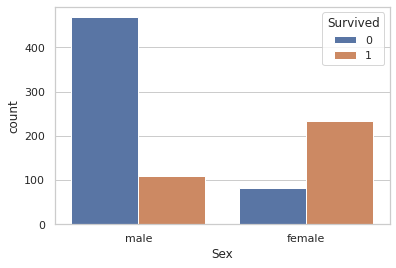

In [215]:
cp = sns.countplot(x="Sex", hue="Survived", data=train_data)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

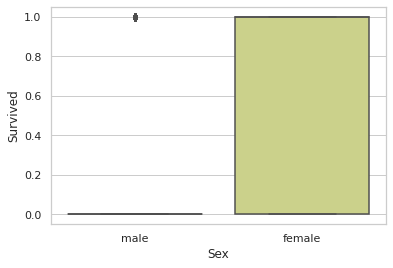

In [216]:
sns.boxplot(x='Sex',y='Survived',data=train_data,palette='rainbow')

Visualizing Fare

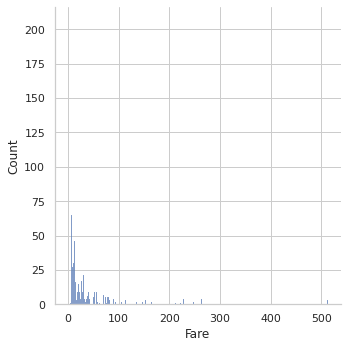

In [217]:
sns.displot(train_data, x="Fare", discrete=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

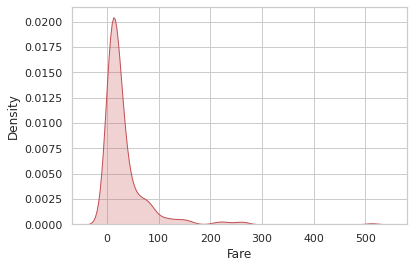

In [218]:
sns.kdeplot(train_data['Fare'], shade=True, color="r")

<AxesSubplot:xlabel='Fare', ylabel='Density'>

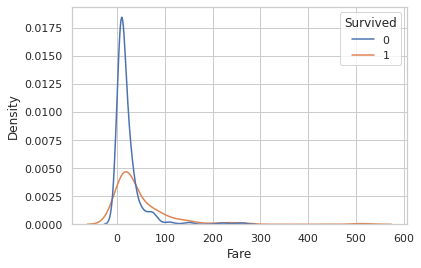

In [219]:
sns.kdeplot(data=train_data, x="Fare", hue="Survived")

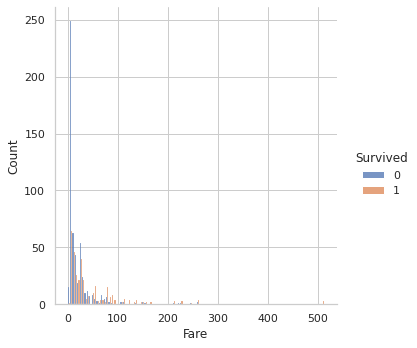

In [220]:
sns.displot(train_data, x="Fare", hue="Survived", multiple="dodge")

Visualizing Parch

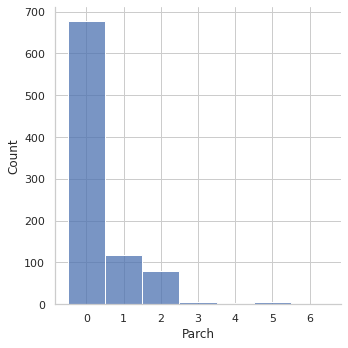

In [221]:
sns.displot(train_data, x="Parch", discrete=True)

<AxesSubplot:xlabel='Parch', ylabel='Density'>

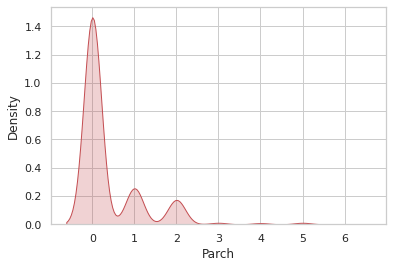

In [222]:
sns.kdeplot(train_data['Parch'], shade=True, color="r")

<AxesSubplot:xlabel='Parch', ylabel='Density'>

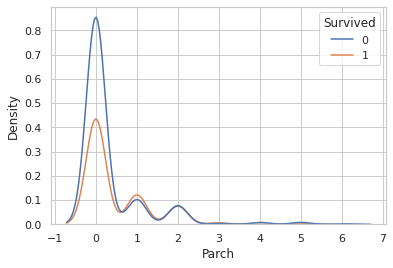

In [223]:
sns.kdeplot(data=train_data, x="Parch", hue="Survived")

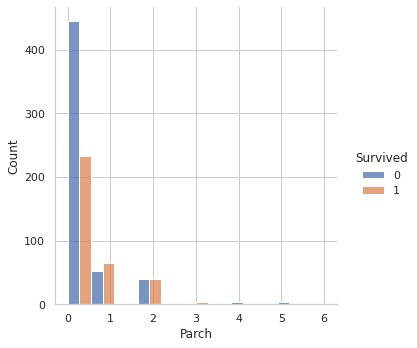

In [224]:
sns.displot(train_data, x="Parch", hue="Survived", multiple="dodge")

<AxesSubplot:>

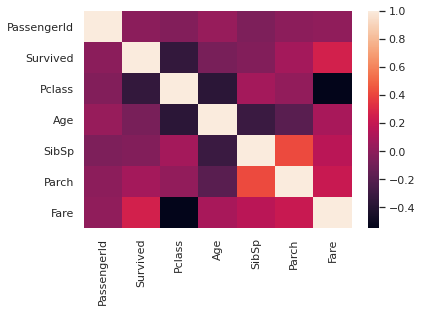

In [225]:
sns.heatmap(train_data.corr())

In [226]:
train_data['Survived'].value_counts().to_frame().rename(columns = {'Survived': 'Total Count'})


,Total Count
0,549
1,342


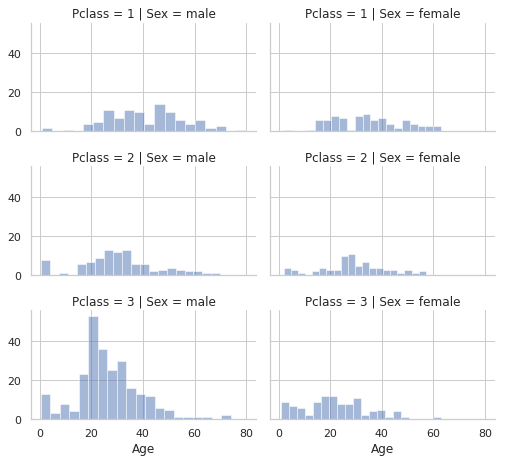

In [227]:
grid = sns.FacetGrid(train_data, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

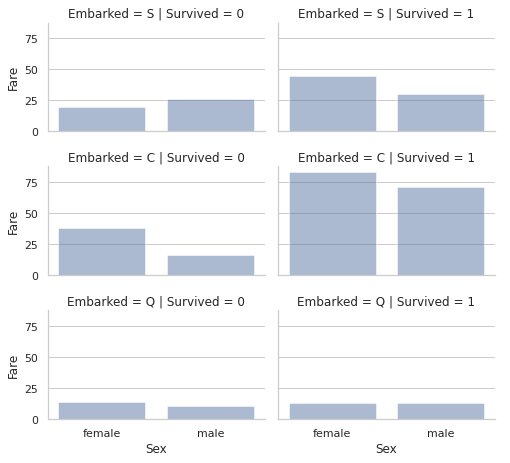

In [228]:
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

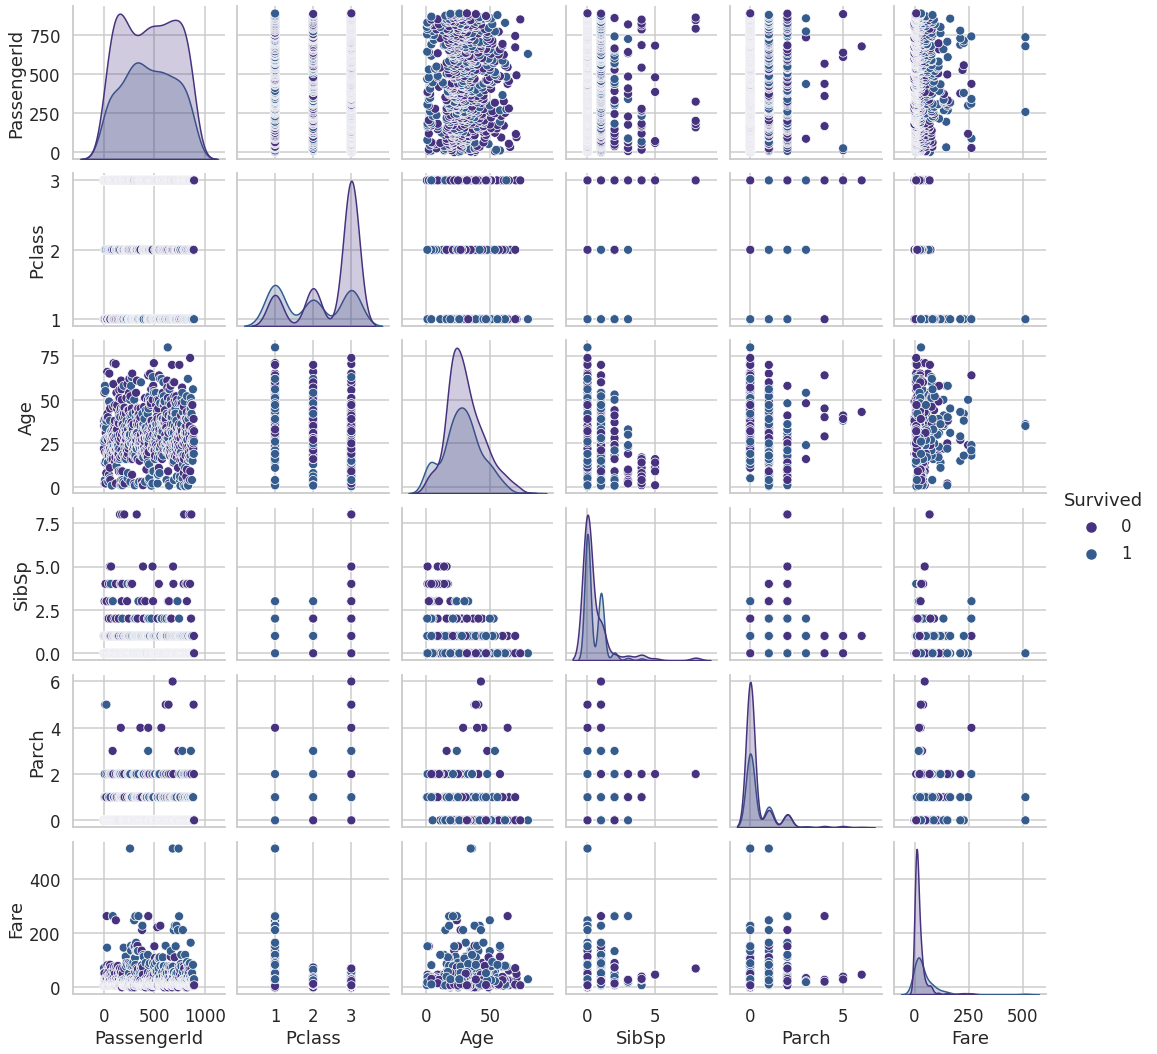

In [229]:
sns.set(style='whitegrid', context='talk', palette='viridis');
sns.pairplot(data=train_data,hue='Survived');

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

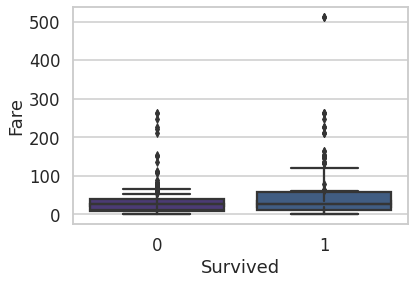

In [230]:
sns.boxplot('Survived','Age', data=train_data, orient='v')
sns.boxplot('Survived','Fare', data=train_data, orient='v')


<AxesSubplot:xlabel='Age', ylabel='Fare'>

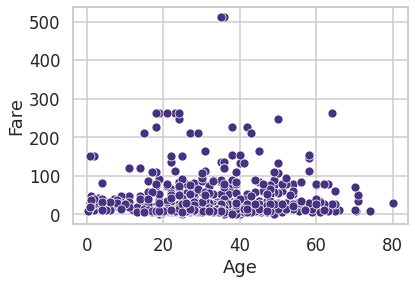

In [231]:
sns.scatterplot(data=train_data, x="Age", y="Fare")

For test data

In [232]:
test_df = test_data.drop(columns=['Name','PassengerId','Cabin','Ticket'])
nunique = test_df.nunique(dropna=False)
nunique

Pclass        3
Sex           2
Age          80
SibSp         7
Parch         8
Fare        170
Embarked      3
dtype: int64

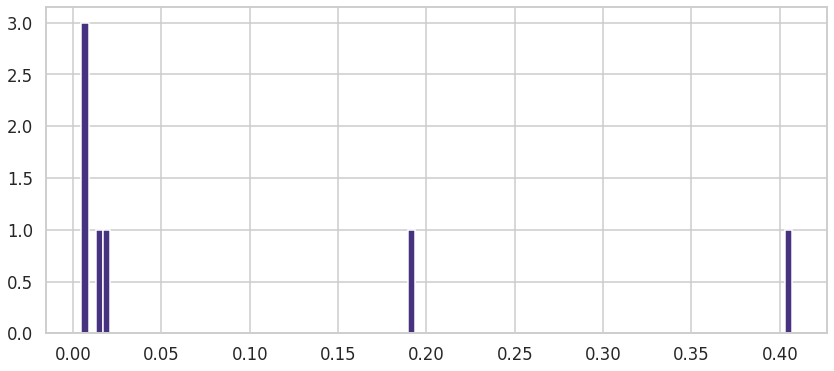

In [233]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/test_df.shape[0], bins=100)

In [234]:
#FEATURES WITH HUGE NUMBER OF unique values
mask = (nunique.astype(float)/test_df.shape[0] > 0.8)
test_df.loc[:, mask]

""
0
1
2
3
4
...
413
414
415
416


In [235]:
mask = (nunique.astype(float)/test_df.shape[0] < 0.8)
test_df.loc[:25, mask]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [236]:
test_data['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

# Data Preprocessing

In [237]:
train_df = pd.read_csv('data/train.csv').drop(['Ticket','Cabin'], axis =1)
y_train = train_df[['Survived']]
train_df = train_df.drop(['Survived'], axis = 1)
test_df = pd.read_csv('data/test.csv').drop(['Ticket','Cabin'], axis=1)
test_PassengerId = test_df['PassengerId'].values #for submission

In [238]:
combine_data = pd.concat([train_df, test_df]).reset_index()
combine_data.tail()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1304,413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1305,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1306,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1307,416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S
1308,417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,22.3583,C


In [239]:
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = combine_data.nunique(dropna = False)

In [240]:
feats_counts.sort_values()

Sex               2
Pclass            3
Embarked          4
SibSp             7
Parch             8
Age              99
Fare            282
index           891
Name           1307
PassengerId    1309
dtype: int64

In [241]:
# constant_features = feats_counts.loc[feats_counts==2].index.tolist()

In [242]:
# print(constant_features)

In [243]:
# constant_features = feats_counts.loc[feats_counts==7].index.tolist()


In [244]:
# print(constant_features)

In [245]:
combine_data['Age'].fillna(int(combine_data['Age'].dropna().mean()), inplace=True)
combine_data['Embarked'].fillna(combine_data['Embarked'].dropna().mode(), inplace=True)

In [246]:
combine_data['Fare'].fillna(int(combine_data['Fare'].dropna().mean()), inplace=True)
combine_data['Fare'].isnull().sum()

0

In [247]:
combine_data.isnull().sum()

index          0
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [248]:
combine_data['Embarked'].fillna(combine_data['Embarked'].dropna().mode().iloc[0], inplace=True)

In [249]:
combine_data['Embarked'].isnull().sum()

0

In [250]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""


combine_data.loc[:, 'Name_length'] = combine_data.Name.apply(len)
combine_data.loc[:, 'Word_count'] = combine_data.Name.apply(lambda x: len(x.split()))

combine_data.loc[:, 'Title'] = combine_data['Name'].apply(get_title)
rare = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

combine_data['Title'] = combine_data['Title'].replace(rare, 'Rare')
combine_data['Title'] = combine_data['Title'].replace('Mlle', 'Miss')
combine_data['Title'] = combine_data['Title'].replace('Ms', 'Miss')
combine_data['Title'] = combine_data['Title'].replace('Mme', 'Mrs')

# Remove Name column
combine_data.drop('Name', axis=1, inplace=True)

In [251]:
train_data['family'] = train_data['SibSp'] + train_data['Parch'] + 1

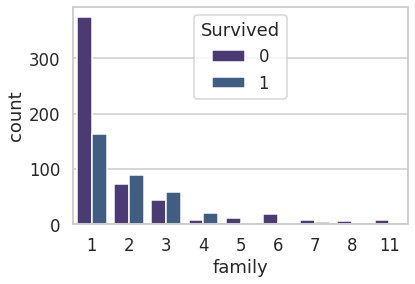

In [252]:
cp = sns.countplot(x="family", hue="Survived", data=train_data)

<AxesSubplot:xlabel='family', ylabel='Density'>

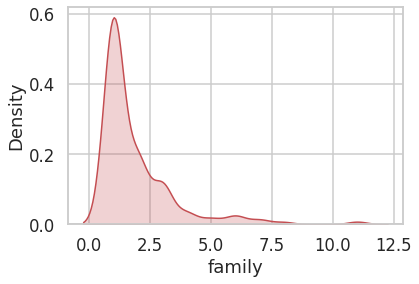

In [253]:
sns.kdeplot(train_data['family'], shade=True, color="r")

In [254]:
combine_data = combine_data.drop(columns=['PassengerId', 'Name_length', 'Word_count'], axis=1)
cat_cols = list(combine_data.select_dtypes(include=['object']).columns)
num_cols = list(combine_data.select_dtypes(exclude=['object']).columns)
combine_data.head(3)

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,2,3,female,26.0,0,0,7.9250,S,Miss


In [255]:
# data_enc = pd.DataFrame(index = combine_data.index)

for col in tqdm_notebook(combine_data[cat_cols]):
    combine_data[col+"2"] = combine_data[col].factorize()[0]

  0%|          | 0/1309 [00:00<?, ?it/s]

In [256]:
combine_data.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex2,Embarked2,Title2
0,0,3,male,22.0,1,0,7.2500,S,Mr,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,1,1
2,2,3,female,26.0,0,0,7.9250,S,Miss,1,0,2
3,3,1,female,35.0,1,0,53.1000,S,Mrs,1,0,1
4,4,3,male,35.0,0,0,8.0500,S,Mr,0,0,0


Removing duplicated features

In [257]:
# #appending the duplicate columns in dup_cols
# dup_cols = []

# for i, c1 in enumerate(tqdm_notebook(data_enc.columns)):
#     for c2 in data_enc.columns[i+1:]:
#         if c2 not in dup_cols and np.all(data_enc[c1] == data_enc[c2]):
#             dup_cols[c2] = c1

In [258]:
# dup_cols

In [259]:
# #As we can see,there is no duplicate column. So we dont need to dump the duplicate columns
# import cPickle as pickle
# pickle.dump(dup_cols, open('dup_cols.p', 'w'), protocol=pickle.HIGHEST_PROTOCOL)

In [260]:
#Drop from the dataset
##combine_data.drop(dup_cols.keys(), axis=1, inplace=True)

In [261]:
scaler = StandardScaler()
scaler.fit(combine_data[num_cols])

StandardScaler()

In [262]:
print(scaler.mean_)

[369.4789916    2.29488159  29.70410237   0.49885409   0.38502674
  33.29525355]


In [263]:
print(scaler.transform(combine_data[num_cols]))

[[-1.48580819  0.84191642 -0.5980002   0.48128777 -0.4449995  -0.50359049]
 [-1.48178683 -1.54609786  0.64393595  0.48128777 -0.4449995   0.73450692]
 [-1.47776547  0.84191642 -0.28751616 -0.47908676 -0.4449995  -0.49053922]
 ...
 [ 0.18305638  0.84191642  0.68274645 -0.47908676 -0.4449995  -0.50359049]
 [ 0.18707774  0.84191642 -0.05465314 -0.47908676 -0.4449995  -0.48812232]
 [ 0.1910991   0.84191642 -0.05465314  0.48128777  0.71076309 -0.21146831]]


In [264]:
scaled_data = pd.DataFrame(scaler.transform(combine_data[num_cols]))
scaled_data.head()

,0,1,2,3,4,5
0,-1.485808,0.841916,-0.598000,0.481288,-0.445,-0.503590
1,-1.481787,-1.546098,0.643936,0.481288,-0.445,0.734507
2,-1.477765,0.841916,-0.287516,-0.479087,-0.445,-0.490539
3,-1.473744,-1.546098,0.411073,0.481288,-0.445,0.382929
4,-1.469723,0.841916,0.411073,-0.479087,-0.445,-0.488122


In [265]:
combine_data[num_cols]

,index,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,2,3,26.0,0,0,7.9250
3,3,1,35.0,1,0,53.1000
4,4,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
1304,413,3,29.0,0,0,8.0500
1305,414,1,39.0,0,0,108.9000
1306,415,3,38.5,0,0,7.2500
1307,416,3,29.0,0,0,8.0500


In [266]:
scaled_data = scaled_data.iloc[:,1:]
scaled_data.head()

,1,2,3,4,5
0,0.841916,-0.598000,0.481288,-0.445,-0.503590
1,-1.546098,0.643936,0.481288,-0.445,0.734507
2,0.841916,-0.287516,-0.479087,-0.445,-0.490539
3,-1.546098,0.411073,0.481288,-0.445,0.382929
4,0.841916,0.411073,-0.479087,-0.445,-0.488122


In [267]:
scaled_data = scaled_data.rename(columns={1:'Pclass2',2:'Age2',3:'SibSp2',4:'Parch2',5:'Fare2'})

In [268]:
scaled_data.head()

,Pclass2,Age2,SibSp2,Parch2,Fare2
0,0.841916,-0.598000,0.481288,-0.445,-0.503590
1,-1.546098,0.643936,0.481288,-0.445,0.734507
2,0.841916,-0.287516,-0.479087,-0.445,-0.490539
3,-1.546098,0.411073,0.481288,-0.445,0.382929
4,0.841916,0.411073,-0.479087,-0.445,-0.488122


In [269]:
combine_data = pd.concat([combine_data, scaled_data], axis=1)
combine_data.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Sex2,Embarked2,Title2,Pclass2,Age2,SibSp2,Parch2,Fare2
0,0,3,male,22.0,1,0,7.2500,S,Mr,0,0,0,0.841916,-0.598000,0.481288,-0.445,-0.503590
1,1,1,female,38.0,1,0,71.2833,C,Mrs,1,1,1,-1.546098,0.643936,0.481288,-0.445,0.734507
2,2,3,female,26.0,0,0,7.9250,S,Miss,1,0,2,0.841916,-0.287516,-0.479087,-0.445,-0.490539
3,3,1,female,35.0,1,0,53.1000,S,Mrs,1,0,1,-1.546098,0.411073,0.481288,-0.445,0.382929
4,4,3,male,35.0,0,0,8.0500,S,Mr,0,0,0,0.841916,0.411073,-0.479087,-0.445,-0.488122


In [270]:
scatter_data = pd.concat([combine_data[:891], y_train], axis=1)

In [271]:
X_train, X_test, y_train, y_test = train_test_split(combine_data[:891],y_train, test_size=0.25, random_state=42)

In [272]:
X_train.columns

Index(['index', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title', 'Sex2', 'Embarked2', 'Title2', 'Pclass2', 'Age2', 'SibSp2',
       'Parch2', 'Fare2'],
      dtype='object')

In [273]:
scaled_ = ['Sex2', 'Embarked2', 'Title2', 'Pclass2', 'Age2', 'SibSp2',
       'Parch2', 'Fare2']
clf = LogisticRegression()
clf.fit(X_train[scaled_],y_train)
prob = clf.predict_proba(X_test[scaled_])

VISUALIZING LOGISTIC REGRESSION AND LINEAR REGRESSION

In [274]:
prob

array([[0.7962142 , 0.2037858 ],
       [0.79529219, 0.20470781],
       [0.87683138, 0.12316862],
       [0.09724344, 0.90275656],
       [0.27457405, 0.72542595],
       [0.05161817, 0.94838183],
       [0.25973989, 0.74026011],
       [0.92433228, 0.07566772],
       [0.19632402, 0.80367598],
       [0.06952155, 0.93047845],
       [0.68784385, 0.31215615],
       [0.93281399, 0.06718601],
       [0.59539993, 0.40460007],
       [0.88922843, 0.11077157],
       [0.81545218, 0.18454782],
       [0.05325753, 0.94674247],
       [0.71740735, 0.28259265],
       [0.25967554, 0.74032446],
       [0.42595223, 0.57404777],
       [0.67398747, 0.32601253],
       [0.88838025, 0.11161975],
       [0.61578911, 0.38421089],
       [0.34151036, 0.65848964],
       [0.87623686, 0.12376314],
       [0.89895497, 0.10104503],
       [0.85572835, 0.14427165],
       [0.25711534, 0.74288466],
       [0.79356691, 0.20643309],
       [0.8338452 , 0.1661548 ],
       [0.33865523, 0.66134477],
       [0.

In [275]:
print(clf)
print('classes:', clf.classes_)
print('coefficients', clf.coef_)
print('intercept:', clf.intercept_)

LogisticRegression()
classes: [0 1]
coefficients [[ 2.17198765  0.16137975  0.38338221 -0.75472985 -0.35885291 -0.3612926
  -0.12531457  0.21855353]]
intercept: [-1.71929045]


In [276]:
from sklearn.metrics import classification_report

In [277]:
print(classification_report(y_test, clf.predict(X_test[scaled_])))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       134
           1       0.75      0.73      0.74        89

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [278]:
ytrain_hat = clf.predict(X_train[scaled_])
ytest_hat = clf.predict(X_test[scaled_])

In [279]:
from sklearn.metrics import mean_squared_error

In [280]:
print(" Train MSE: ",mean_squared_error(y_train, ytrain_hat))
print(" Test MSE: ",mean_squared_error(y_test, ytest_hat))

 Train MSE:  0.18263473053892215
 Test MSE:  0.2062780269058296


In [281]:
from sklearn.metrics import confusion_matrix

In [282]:
#for test data
confusion_matrix(y_test, ytest_hat)

array([[112,  22],
       [ 24,  65]])

Using Linear Discriminant Analysis

In [283]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train[scaled_], y_train)
ytrain_hat = lda.predict(X_train[scaled_])
ytest_hat = lda.predict(X_test[scaled_])


In [284]:
print(" USING LINEAR DISCRIMINANT ANALYSIS")
print("TRAIN MSE: ", mean_squared_error(y_train, ytrain_hat))
print("TEST MSE: ", mean_squared_error(y_test, ytest_hat))

 USING LINEAR DISCRIMINANT ANALYSIS
TRAIN MSE:  0.19610778443113772
TEST MSE:  0.23318385650224216


In [285]:
confusion_matrix(y_test, ytest_hat)

array([[107,  27],
       [ 25,  64]])

In [286]:
print(classification_report(y_test, ytest_hat))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       134
           1       0.70      0.72      0.71        89

    accuracy                           0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



Confusion matrix, without normalization
[[107  27]
 [ 25  64]]
Normalized confusion matrix
[[0.79850746 0.20149254]
 [0.28089888 0.71910112]]


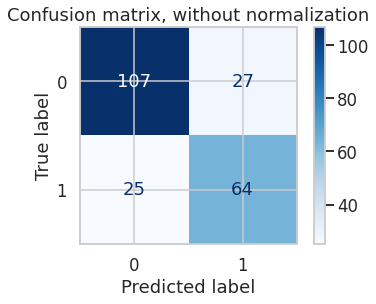

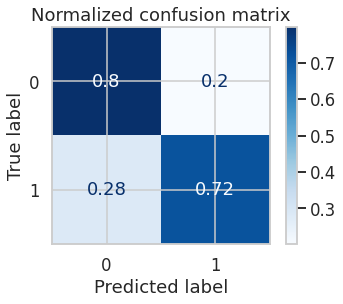

In [287]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(lda, X_test[scaled_], y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Using Quadratic Discriminant Analysis

In [288]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[scaled_], y_train)
ytrain_hat = qda.predict(X_train[scaled_])
ytest_hat = qda.predict(X_test[scaled_])

In [289]:
print(" USING Quadratic DISCRIMINANT ANALYSIS")
print("TRAIN MSE: ", mean_squared_error(y_train, ytrain_hat))
print("TEST MSE: ", mean_squared_error(y_test, ytest_hat))

 USING Quadratic DISCRIMINANT ANALYSIS
TRAIN MSE:  0.18562874251497005
TEST MSE:  0.21076233183856502


Confusion matrix, without normalization
[[112  22]
 [ 25  64]]
Normalized confusion matrix
[[0.8358209  0.1641791 ]
 [0.28089888 0.71910112]]


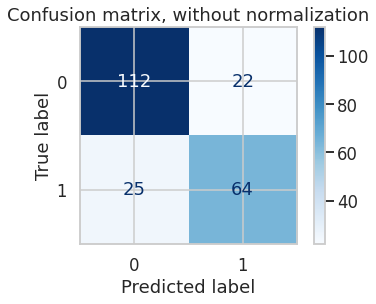

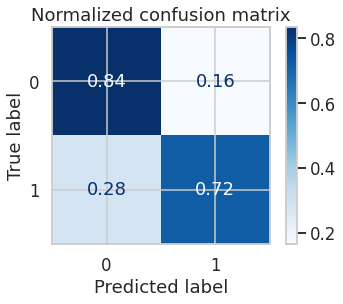

In [290]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(qda, X_test[scaled_], y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [291]:
print(classification_report(y_test, ytest_hat))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       134
           1       0.74      0.72      0.73        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [292]:
qda.priors_

array([0.62125749, 0.37874251])

In [293]:
qda.means_

array([[ 0.14216867,  0.30361446,  0.44337349,  0.29238542,  0.01941414,
         0.09019549, -0.06902854, -0.21819853],
       [ 0.67193676,  0.4229249 ,  1.34387352, -0.35681012, -0.10685863,
        -0.00838936,  0.0757789 ,  0.30094889]])

Using K-NEAREST NEIGHBORS

In [294]:
knn = KNeighborsClassifier(n_neighbors = 10)
pred = knn.fit(X_train[scaled_], y_train)
knn.fit(X_train[scaled_], y_train)
ytrain_hat = knn.predict(X_train[scaled_])
ytest_hat = knn.predict(X_test[scaled_])

In [295]:
print(" USING KNearestNeighbor Classifier")
print("TRAIN MSE: ", mean_squared_error(y_train, ytrain_hat))
print("TEST MSE: ", mean_squared_error(y_test, ytest_hat))

 USING KNearestNeighbor Classifier
TRAIN MSE:  0.1661676646706587
TEST MSE:  0.2062780269058296


Confusion matrix, without normalization
[[112  22]
 [ 25  64]]
Normalized confusion matrix
[[0.8358209  0.1641791 ]
 [0.28089888 0.71910112]]


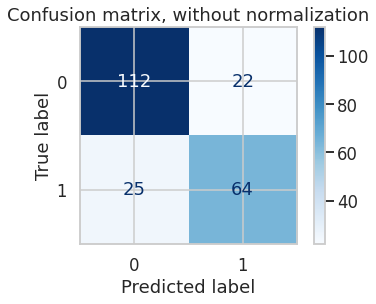

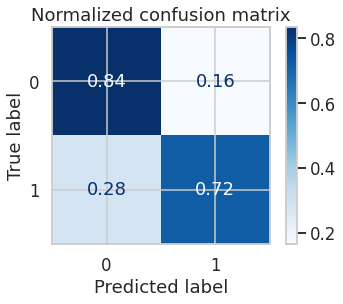

In [296]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(qda, X_test[scaled_], y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [297]:
knn = KNeighborsClassifier(n_neighbors = 9)
pred = knn.fit(X_train[scaled_], y_train)
knn.fit(X_train[scaled_], y_train)
ytrain_hat = knn.predict(X_train[scaled_])
ytest_hat = knn.predict(X_test[scaled_])

In [298]:
print(" USING KNearestNeighbor Classifier")
print("TRAIN MSE: ", mean_squared_error(y_train, ytrain_hat))
print("TEST MSE: ", mean_squared_error(y_test, ytest_hat))

 USING KNearestNeighbor Classifier
TRAIN MSE:  0.16766467065868262
TEST MSE:  0.2062780269058296


Confusion matrix, without normalization
[[112  22]
 [ 25  64]]
Normalized confusion matrix
[[0.8358209  0.1641791 ]
 [0.28089888 0.71910112]]


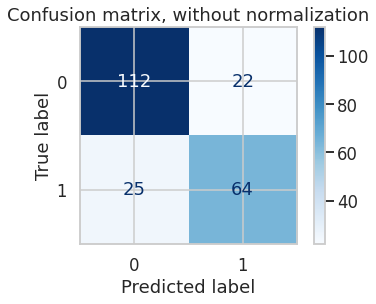

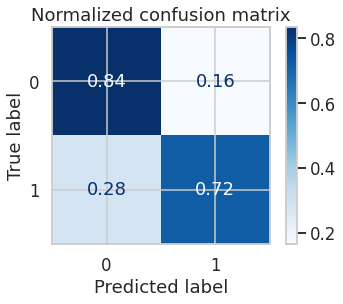

In [299]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(qda, X_test[scaled_], y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Using RANDOM FOREST CLASSIFIER

In [300]:
combine_data.columns

Index(['index', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title', 'Sex2', 'Embarked2', 'Title2', 'Pclass2', 'Age2', 'SibSp2',
       'Parch2', 'Fare2'],
      dtype='object')

In [301]:
nscaled_ = ['Pclass', 'Sex2', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked2',
       'Title2']
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train[nscaled_], y_train)
print("%.4f" % rf.oob_score_)

0.8249


In [302]:
ytrain_hat = rf.predict(X_train[nscaled_])
ytest_hat = rf.predict(X_test[nscaled_])

In [303]:
print(" USING Random Forest Classifier")
print("TRAIN MSE: ", mean_squared_error(y_train, ytrain_hat))
print("TEST MSE: ", mean_squared_error(y_test, ytest_hat))

 USING Random Forest Classifier
TRAIN MSE:  0.09431137724550898
TEST MSE:  0.15695067264573992


In [304]:
print(classification_report(y_test, ytest_hat))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       134
           1       0.81      0.79      0.80        89

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.84       223
weighted avg       0.84      0.84      0.84       223



Confusion matrix, without normalization
[[118  16]
 [ 19  70]]
Normalized confusion matrix
[[0.88059701 0.11940299]
 [0.21348315 0.78651685]]


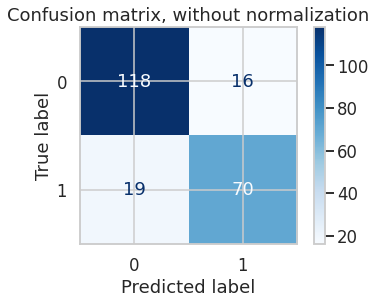

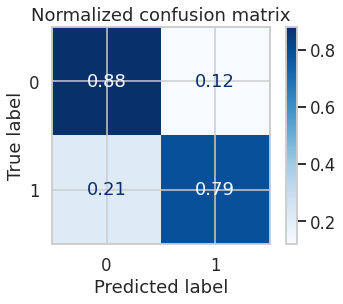

In [305]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf, X_test[nscaled_], y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [306]:
#I our case Random FOrest works better than other machine learning models.
#So, I am going to apply Random Forest

In [310]:
test_pred = rf.predict(combine_data[891:][nscaled_])
test_pred


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [311]:
test_pred = pd.DataFrame(test_pred,columns=['Survived',] )
test_pred

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [313]:
check = pd.read_csv('data/gender_submission.csv')
check

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [315]:
check = check.drop(['Survived'], axis =1)

In [316]:
submission = pd.concat([check,test_pred], axis = 1)
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [317]:
submission.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [318]:
submission.to_csv('data/submission.csv', index = False)